<a href="https://colab.research.google.com/github/lattehauma/-/blob/main/Food_choices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Food choices

대학생들의 음식과 요리 선호에 관한 설문조사 분석 및 시각화

* 조사대상: Mercyhurst 대학생(미국 펜실베니아에 위치함)
* 조사인원: 126명

______

살펴보고자 하는 인사이트
* 대학생에게 영양분 정보는 중요한가?
* 어린 시절의 맛의 취향은 어떻게 영향을 미쳤을까?
* 요리를 하는 학생은 다른 학생들에 비해서 다른 취향을 가지고 있을까?



_____
** 주의사항: 약간의 nlp 처리가 필요할 것 같음(comfort food, cuisine관련)

Data Research and visualization about food choices and preferences of college students

* Object : college student of mercyhurst university
* Sample # : 126

Insights
* How important is nutrition information for today's college kids?
* Is their taste in food defined by their food preferences when they were children? 
* Are kids of parents who cook more likely to make better food choices than others?

____
*! Some column needs nlp process(comfort food, favorite cuisine...)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
food=pd.read_csv('/content/drive/MyDrive/colab/food choices/food_coded.csv')

In [ ]:
print(food.shape)
print(food.columns)

(125, 61)
Index(['GPA', 'Gender', 'breakfast', 'calories_chicken', 'calories_day',
       'calories_scone', 'coffee', 'comfort_food', 'comfort_food_reasons',
       'comfort_food_reasons_coded', 'cook', 'comfort_food_reasons_coded.1',
       'cuisine', 'diet_current', 'diet_current_coded', 'drink',
       'eating_changes', 'eating_changes_coded', 'eating_changes_coded1',
       'eating_out', 'employment', 'ethnic_food', 'exercise',
       'father_education', 'father_profession', 'fav_cuisine',
       'fav_cuisine_coded', 'fav_food', 'food_childhood', 'fries', 'fruit_day',
       'grade_level', 'greek_food', 'healthy_feeling', 'healthy_meal',
       'ideal_diet', 'ideal_diet_coded', 'income', 'indian_food',
       'italian_food', 'life_rewarding', 'marital_status',
       'meals_dinner_friend', 'mother_education', 'mother_profession',
       'nutritional_check', 'on_off_campus', 'parents_cook', 'pay_meal_out',
       'persian_food', 'self_perception_weight', 'soup', 'sports', 'thai_food

## 데이터 탐색 data exploration


학점 GPA

In [ ]:
print(food['GPA'].head())
print(food['GPA'].unique())

0      2.4
1    3.654
2      3.3
3      3.2
4      3.5
Name: GPA, dtype: object
['2.4' '3.654' '3.3' '3.2' '3.5' '2.25' '3.8' '3.904' '3.4' '3.6' '3.1'
 nan '4' '2.2' '3.87' '3.7' '3.9' '2.8' '3' '3.65' '3.89' '2.9' '3.605'
 '3.83' '3.292' '3.35' 'Personal ' '2.6' '3.67' '3.73' '3.79 bitch' '2.71'
 '3.68' '3.75' '3.92' 'Unknown' '3.77' '3.63' '3.882']


In [ ]:
food['GPA'] = pd.to_numeric(food['GPA'],errors = 'coerce')
#personal, unknown 등은 NAN로 바꾸어줌

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


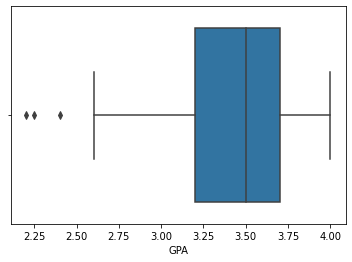

In [ ]:
sns.boxplot(food['GPA'])

In [ ]:
food['Gender'].value_counts()

1    76
2    49
Name: Gender, dtype: int64

In [ ]:
food.loc[food['Gender']==1,'Gender']='woman'
food.loc[food['Gender']==2,'Gender']='man'

In [ ]:
49*1.5

73.5

## 설문결과 분석

대학생들은 칼로리에 대해서 얼마나 관심을 가지고 있을까?

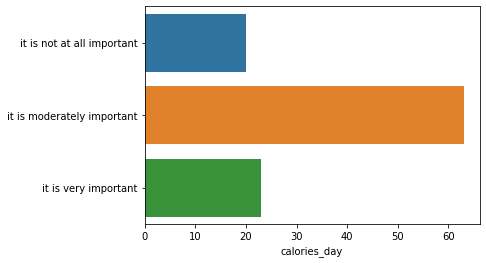

In [ ]:
calval=pd.DataFrame(food['calories_day'].value_counts(), )
calval=calval.sort_index()
calval.index=['it is not at all important', 'it is moderately important', 'it is very important']
sns.barplot(x=calval['calories_day'], y=calval.index)


In [ ]:
calval1=pd.DataFrame(food[food['Gender']==1]['calories_day'].value_counts()).sort_index()
calval2=pd.DataFrame(food[food['Gender']==2]['calories_day'].value_counts()).sort_index()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


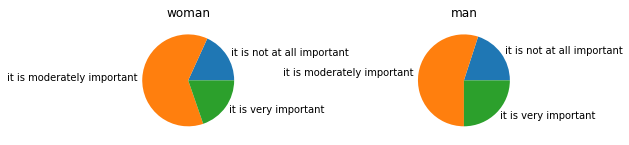

In [ ]:
plt.figure(figsize=(7,11))

plt.subplot(1,3,1)
plt.pie(calval1, labels=calval.index)
plt.title('woman')

plt.subplot(1,3,3)
plt.pie(calval2, labels=calval.index)
plt.title('man')

plt.show()

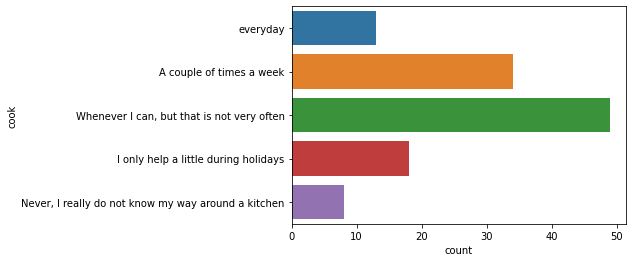

In [ ]:
lab=['everyday','A couple of times a week','Whenever I can, but that is not very often','I only help a little during holidays','Never, I really do not know my way around a kitchen']
sns.countplot(y=food['cook']).set_yticklabels(lab)
plt.show()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.


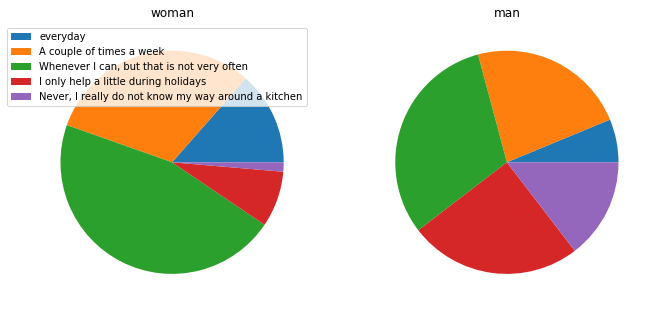

In [ ]:
cook1=pd.DataFrame(food[food['Gender']==1]['cook'].value_counts()).sort_index()
cook2=pd.DataFrame(food[food['Gender']==2]['cook'].value_counts()).sort_index()


label=['everyday',
       'A couple of times a week',
       'Whenever I can, but that is not very often',
       'I only help a little during holidays',
       'Never, I really do not know my way around a kitchen']
plt.figure(figsize=(11,11))

plt.subplot(1,2,1)
plt.pie(cook1)
plt.title('woman')
plt.legend(label, loc="best")

plt.subplot(1,2,2)
plt.pie(cook2)
plt.title('man')

plt.show()

In [ ]:
tab1=pd.crosstab(food['cook'],food['calories_day'])

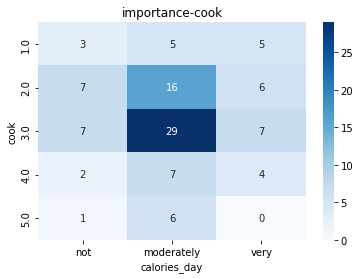

In [ ]:
lab1=['not','moderately','very']

heat1=sns.heatmap(tab1, cmap='Blues', annot=True).set_xticklabels(lab1)
plt.title("importance-cook")
plt.show()

식습관의 변화

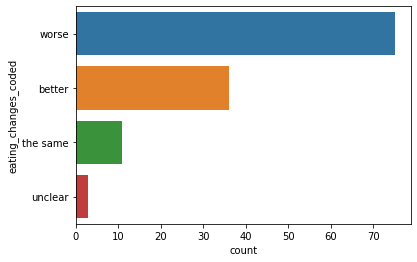

In [ ]:
lab2=['worse','better','the same','unclear']
sns.countplot(y=food['eating_changes_coded']).set_yticklabels(lab2)
plt.show()

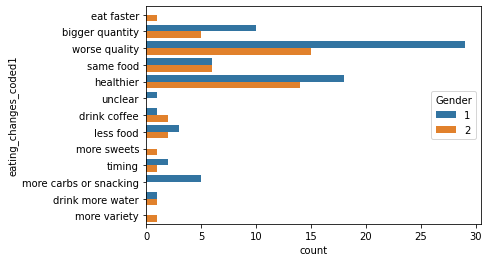

In [ ]:
lab3=['eat faster','bigger quantity','worse quality','same food','healthier','unclear','drink coffee','less food','more sweets','timing','more carbs or snacking','drink more water','more variety']
foodcount=sns.countplot(y=food['eating_changes_coded1'], hue=food['Gender'])
foodcount.set_yticklabels(lab3)
plt.show()

In [ ]:
food.loc[food['employment']==1,'employment']='full time'
food.loc[food['employment']==2,'employment']='part time'
food.loc[food['employment']==3,'employment']='no'
food.loc[food['employment']==4,'employment']='other'

외식을 얼마나 자주하는가

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


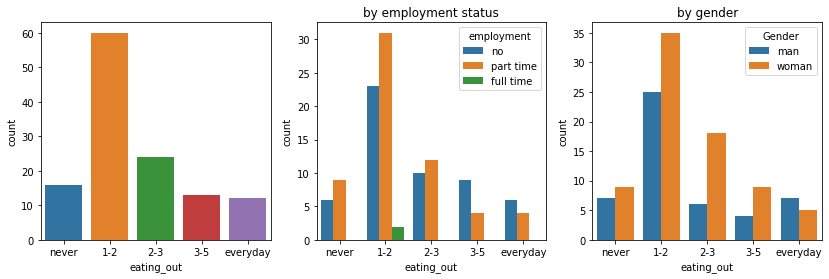

In [ ]:
plt.figure(figsize=(14,4))
plt.subplot(1,3,1)
eatout=sns.countplot(food['eating_out'])
eatout.set_xticklabels(["never",'1-2','2-3','3-5','everyday'])

plt.subplot(1,3,2)
eatout1=sns.countplot(food['eating_out'], hue=food['employment'])
eatout1.set_xticklabels(["never",'1-2','2-3','3-5','everyday'])
plt.title('by employment status')

plt.subplot(1,3,3)
eatout2=sns.countplot(food['eating_out'], hue=food['Gender'])
eatout2.set_xticklabels(["never",'1-2','2-3','3-5','everyday'])
plt.title('by gender')

plt.show()

운동을 얼마나 자주하는가

[Text(0, 0, 'everyday'), Text(0, 0, '2,3 per week'), Text(0, 0, 'once a week')]

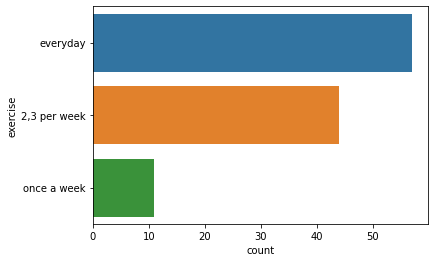

In [ ]:
lab4=['everyday','2,3 per week','once a week']
sns.countplot(y=food['exercise']).set_yticklabels(lab4)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

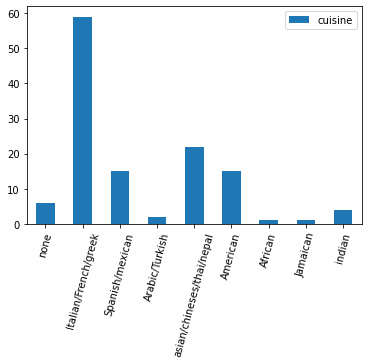

In [ ]:
fav=pd.DataFrame(food['fav_cuisine_coded'].value_counts())
fav=fav.sort_index()
fav.index=['none','Italian/French/greek','Spanish/mexican','Arabic/Turkish','asian/chineses/thai/nepal',
           'American','African','Jamaican', 'indian']

fav.columns=['cuisine']
fav.plot(kind='bar', )
plt.xticks(rotation=75)

몸무게

In [ ]:
weight=food['weight']

In [ ]:
weight=weight.astype('str').apply(
    lambda x: re.findall(r'\d+', x)
)

In [ ]:
df=weight.apply(lambda x: pd.Series(x))
df.columns=['weight']
df.head(10)
food['weight']=df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


In [ ]:
food['weight'] = pd.to_numeric(food['weight'],errors = 'coerce')
food['weight'].head(5)

0    187.0
1    155.0
2      NaN
3    240.0
4    190.0
Name: weight, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


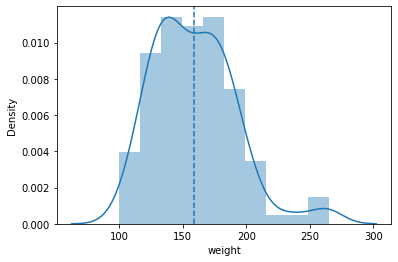

In [ ]:
sns.distplot(food['weight'])
plt.axvline(food['weight'].mean(), linestyle='dashed')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


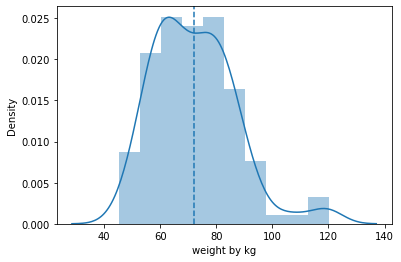

In [ ]:
kgweight=food['weight']*0.45359237
sns.distplot(kgweight)
plt.xlabel('weight by kg')
plt.axvline(kgweight.mean(), linestyle='dashed')
plt.show()

In [ ]:
food['kgweight']=kgweight

In [ ]:
food['Gender']

0      2
1      1
2      1
3      1
4      1
      ..
120    1
121    1
122    1
123    2
124    1
Name: Gender, Length: 125, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


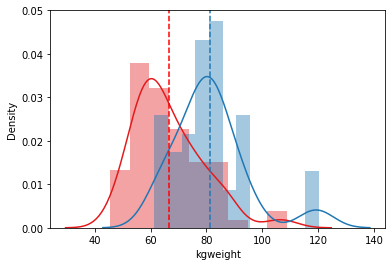

In [ ]:
figure.set_size_inches(12,5)
sns.distplot(food['kgweight'].loc[food['Gender']==1].dropna(),
             color=sns.color_palette("Paired")[5])
sns.distplot(food['kgweight'].loc[food['Gender']==2].dropna())
plt.axvline(food['kgweight'].loc[food['Gender']==1].mean(),
            color='r', linestyle='dashed')
plt.axvline(food['kgweight'].loc[food['Gender']==2].mean(), linestyle='dashed')



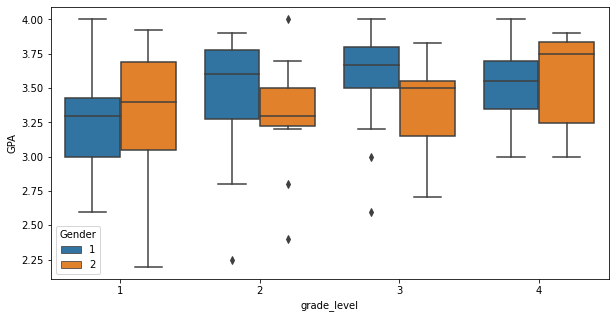

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='grade_level', y='GPA', hue='Gender', data=food)

## 주관식 질문들 분석

In [ ]:
food.head()

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,cook,comfort_food_reasons_coded.1,cuisine,diet_current,diet_current_coded,drink,eating_changes,eating_changes_coded,eating_changes_coded1,eating_out,employment,ethnic_food,exercise,father_education,father_profession,fav_cuisine,fav_cuisine_coded,fav_food,food_childhood,fries,fruit_day,grade_level,greek_food,healthy_feeling,healthy_meal,ideal_diet,ideal_diet_coded,income,indian_food,italian_food,life_rewarding,marital_status,meals_dinner_friend,mother_education,mother_profession,nutritional_check,on_off_campus,parents_cook,pay_meal_out,persian_food,self_perception_weight,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight,kgweight
0,2.400,2,1,430,NaN,315.0,1,none,we dont have comfort,9.0,2.0,9,NaN,eat good and exercise,1,1.0,eat faster,1,1,3,3.0,1,1.0,5.0,profesor,Arabic cuisine,3,1.0,rice and chicken,2,5,2,5,2,looks not oily,being healthy,8,5.0,5,5,1.0,1.0,"rice, chicken, soup",1.0,unemployed,5,1.0,1,2,5.0,3.0,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187.0,84.821773
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,3.0,1,1.0,I eat about three times a day with some snacks...,2,2.0,I eat out more than usual.,1,2,2,2.0,4,1.0,2.0,Self employed,Italian,1,1.0,"chicken and biscuits, beef soup, baked beans",1,4,4,4,5,"Grains, Veggies, (more of grains and veggies),...",Try to eat 5-6 small meals a day. While trying...,3,4.0,4,4,1.0,2.0,"Pasta, steak, chicken",4.0,Nurse RN,4,1.0,1,4,4.0,3.0,1.0,1.0,2,725.0,690,Basketball,4,2,900,155.0,70.306817
2,3.300,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,1.0,1,3.0,"toast and fruit for breakfast, salad for lunch...",3,1.0,sometimes choosing to eat fast food instead of...,1,3,2,3.0,5,2.0,2.0,owns business,italian,1,3.0,"mac and cheese, pizza, tacos",1,5,3,5,6,usually includes natural ingredients; nonproce...,i would say my ideal diet is my current diet,6,6.0,5,5,7.0,2.0,"chicken and rice with veggies, pasta, some kin...",2.0,owns business,4,2.0,1,3,5.0,6.0,1.0,2.0,5,1165.0,500,none,5,1,900,NaN,NaN
3,3.200,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,2.0,2,2.0,"College diet, cheap and easy foods most nights...",2,2.0,Accepting cheap and premade/store bought foods,1,3,2,3.0,5,3.0,2.0,Mechanic,Turkish,3,1.0,"Beef stroganoff, tacos, pizza",2,4,4,5,7,"Fresh fruits& vegetables, organic meats","Healthy, fresh veggies/fruits & organic foods",2,6.0,5,5,2.0,2.0,Grilled chicken \rStuffed Shells\rHomemade Chili,4.0,Special Education Teacher,2,1.0,1,2,5.0,5.0,1.0,2.0,5,725.0,690,NaN,3,1,1315,240.0,108.862169
4,3.500,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,1.0,1,2.0,I try to eat healthy but often struggle becaus...,2,2.0,I have eaten generally the same foods but I do...,3,4,2,2.0,4,1.0,4.0,IT,Italian,1,3.0,"Pasta, chicken tender, pizza",1,4,4,4,6,"A lean protein such as grilled chicken, green ...",Ideally I would like to be able to eat healthi...,2,6.0,2,5,1.0,1.0,"Chicken Parmesan, Pulled Pork, Spaghetti and m...",5.0,Substance Abuse Conselor,3,1.0,1,4,2.0,4.0,1.0,1.0,4,940.0,500,Softball,4,2,760,190.0,86.182550


In [ ]:
food['comfort_food'].head()

0                                none
1         chocolate, chips, ice cream
2     frozen yogurt, pizza, fast food
3    Pizza, Mac and cheese, ice cream
4        Ice cream, chocolate, chips 
Name: comfort_food, dtype: object

In [ ]:
food['comfort_food']=food['comfort_food'].astype('str').apply(
    lambda x: x.split(',')
)
food['comfort_food'].head()

0                                  [none]
1         [chocolate,  chips,  ice cream]
2     [frozen yogurt,  pizza,  fast food]
3    [Pizza,  Mac and cheese,  ice cream]
4        [Ice cream,  chocolate,  chips ]
Name: comfort_food, dtype: object

In [ ]:
com1=food.apply(lambda x: pd.Series(x['comfort_food']), axis=1).stack().reset_index(level=1, drop=True)
com1.name='comfort food'
com1.head(10)

0               none
1          chocolate
1              chips
1          ice cream
2      frozen yogurt
2              pizza
2          fast food
3              Pizza
3     Mac and cheese
3          ice cream
Name: comfort food, dtype: object

In [ ]:
com2=pd.DataFrame(com1)

In [ ]:
com2.columns=['food']
com2.head()

,food
0,none
1,chocolate
1,chips
1,ice cream
2,frozen yogurt


In [ ]:
com2['food']=com2['food'].astype('str').apply(
    lambda x: x.split('/')
)
com2=com2.apply(lambda x: pd.Series(x['food']), axis=1).stack().reset_index(level=1, drop=True)
com2.head(10)

0               none
1          chocolate
1              chips
1          ice cream
2      frozen yogurt
2              pizza
2          fast food
3              Pizza
3     Mac and cheese
3          ice cream
dtype: object

In [ ]:
com2.loc[120:]

120    wine. mac and cheese
120                   pizza
120              ice cream 
121                  Pizza 
121                  Wings 
121              Cheesecake
122                    rice
122                  potato
122            seaweed soup
123            Mac n Cheese
123                 Lasagna
123                   Pizza
124              Chocolates
124                   pizza
124               and Ritz.
dtype: object

In [ ]:
com2=com2.astype('str').apply(
    lambda x: re.sub(r'\s+',"", x)
)
com2

0              none
1         chocolate
1             chips
1          icecream
2      frozenyogurt
           ...     
123         Lasagna
123           Pizza
124      Chocolates
124           pizza
124        andRitz.
Length: 389, dtype: object

In [ ]:
com2.drop([0])

1         chocolate
1             chips
1          icecream
2      frozenyogurt
2             pizza
           ...     
123         Lasagna
123           Pizza
124      Chocolates
124           pizza
124        andRitz.
Length: 388, dtype: object

In [ ]:
com2=com2.reset_index()
com2=pd.DataFrame(com2)
com2=com2.drop('index', axis=1)
com2.columns=['food']
com2

,0
0,none
1,chocolate
2,chips
3,icecream
4,frozenyogurt
...,...
384,Lasagna
385,Pizza
386,Chocolates
387,pizza


In [ ]:
print(com2['food'][388])
print(com2['food'][388][0:3])

andRitz.
and


In [ ]:
com2['food2']=0
com2

,food,food2
1,chocolate,0
2,chips,0
3,icecream,0
4,frozenyogurt,0
5,pizza,0
...,...,...
384,Lasagna,0
385,Pizza,0
386,Chocolates,0
387,pizza,0


In [ ]:
for i in range(1,389):
  if com2['food'][i][0:3]=='and':
    com2['food2'][i]=com2['food'][i][3:]
  else:
    com2['food2'][i]=com2['food'][i]
com2=com2.drop('food', axis=1)

In [ ]:
com2.loc[380:]

,food2
380,rice
381,potato
382,seaweedsoup
383,MacnCheese
384,Lasagna
385,Pizza
386,Chocolates
387,pizza
388,Ritz.


(-0.5, 799.5, 799.5, -0.5)

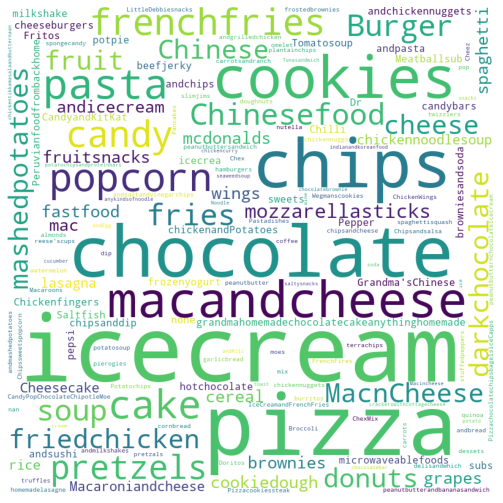

In [ ]:
from wordcloud import WordCloud

text=" ".join(com1)
wc1=WordCloud(max_font_size=150, width=800, height=800, background_color='white')
wc1.generate(text)
plt.figure(figsize=(15,9))
plt.imshow(wc1)
plt.axis('off')

In [ ]:
com1.value_counts()


icecream                                        30
pizza                                           25
chips                                           17
chocolate                                       17
cookies                                         14
Pizza                                           12
Icecream                                        12
Chocolate                                        8
cake                                             7
pasta                                            6
macandcheese                                     5
Macandcheese                                     5
                                                 5
Chips                                            5
popcorn                                          5
candy                                            4
pretzels                                         4
frenchfries                                      4
Chinesefood                                      4
fries                          

(-0.5, 799.5, 799.5, -0.5)

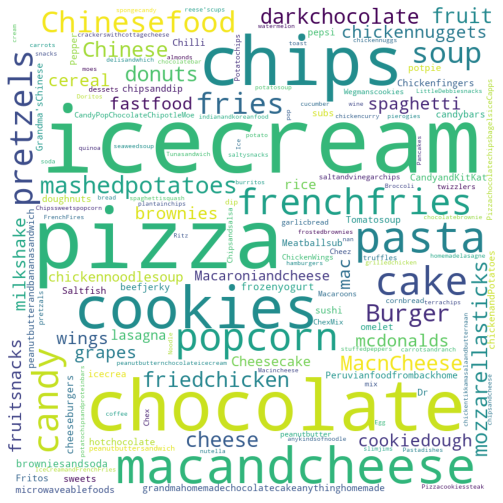

In [ ]:
from wordcloud import WordCloud
text=" "
text=" ".join(com2['food2'])
wc1=WordCloud(max_font_size=150, width=800, height=800, background_color='white')
wc1.generate(text)
plt.figure(figsize=(15,9))
plt.imshow(wc1)
plt.axis('off')

In [ ]:
text=" "
text=" ".join(com2['food2'])
text

"chocolate chips icecream frozenyogurt pizza fastfood Pizza Macandcheese icecream Icecream chocolate chips Candy browniesandsoda. Chocolate icecream frenchfries pretzels Icecream cheeseburgers chips. Donuts icecream chips Macandcheese chocolate pasta Pasta grandmahomemadechocolatecakeanythinghomemade chocolate pasta soup chips popcorn Cookies popcorn chips icecream cake chocolate Pizza fruit spaghetti chickenandPotatoes cookies donuts candybars Saltfish CandyandKitKat chips cookies icecream Chocolate icecrea pizza wings Chinese Fastfood pizza subs chocolate sweets icecream burgers chips cookies Chilli soup potpie Soup pasta brownies cake chocolate icecream milkshake cookies Chips icecream microwaveablefoods Chickenfingers pizza cookies hotchocolate beefjerky Tomatosoup pizza Fritos Meatballsub Dr.Pepper cookies mac-n-cheese brownies frenchfries  chipsanddip pepsi  Grandma'sChinese Peruvianfoodfrombackhome sushi Icecream cookies Chinesefood chickennuggets frenchfries chips icecream macn